In [225]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing our Data

In [106]:
# Loading the breast cancer dataset
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
breast_data = breast.data 
breast_labels = breast.target # these are the labels to predict (benign/ malignant)

labels = np.reshape(breast_labels,(569,1)) 
final_breast_data = np.concatenate([breast_data,labels],axis=1) # build full dataset
breast_dataset = pd.DataFrame(final_breast_data) # make into a dataframe
breast_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [107]:
# adding the feature names to columns, names to labels

features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
#breast_dataset['label'].replace(0, 'Benign',inplace=True)
#breast_dataset['label'].replace(1, 'Malignant',inplace=True)


In [ ]:
# breast_dataset.info() note: everything is already numerical! yay

In [108]:
# Split into train and test sets

from sklearn.model_selection import train_test_split

train, test = train_test_split(breast_dataset, test_size=0.2)

Exploring our Data

In [ ]:
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())

In [ ]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

In [111]:
print(train.columns.values)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension' 'label']


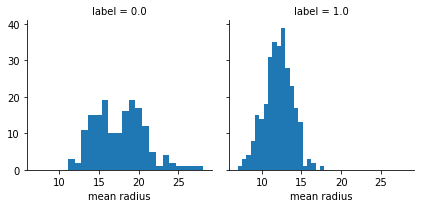

In [112]:
# plotting
g = sns.FacetGrid(train, col='label')
g.map(plt.hist, 'mean radius', bins=20)


Preparing our Data for Clustering

In [ ]:
# categorical data must be changed to numerical

train.info()

In [ ]:
# missing values must be removed or imputed

print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
print(test.isna().sum())

In [ ]:
# if there are missing values... 

# Fill with mean column values in the train set
train.fillna(train.mean(), inplace=True)
# Fill with mean column values in the test set
test.fillna(test.mean(), inplace=True)

Building a K-Means Model

In [255]:
# note: results were better with MinMaxScaler than with StandardScaler

In [256]:
# drop the labels
X = np.array(train.drop(['label'], 1).astype(float))
y = np.array(train['label'])

# scale the features
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(X)

# fit the model to our scaled features
kmeans = KMeans(n_clusters=2, max_iter=300) 
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Validating our Model

In [257]:
# what percentage of cases did we cluster correctly? 

correct = 0
for i in range(len(X)):
    to_predict = np.array(X_scaled[i].astype(float))
    to_predict = to_predict.reshape(-1, len(to_predict))
    prediction = kmeans.predict(to_predict)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.9406593406593406


In [214]:
y_km = kmeans.predict(X_scaled)
#y_km

In [266]:
pd.DataFrame(X_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.305220,0.335475,0.290581,0.179113,0.341699,0.122500,0.137254,0.170875,0.231944,0.142165,...,0.398810,0.475746,0.370004,0.248984,0.455194,0.123517,0.211182,0.398625,0.254419,0.121479
1,0.225709,0.265472,0.221823,0.118616,0.493545,0.228879,0.123758,0.220676,0.231944,0.354044,...,0.221032,0.425373,0.213036,0.113065,0.420855,0.153399,0.109105,0.347079,0.173784,0.146825
2,0.223342,0.317890,0.211043,0.116833,0.320574,0.090353,0.037090,0.057058,0.430417,0.238416,...,0.185714,0.387260,0.170552,0.091752,0.337648,0.078984,0.063219,0.197285,0.374181,0.094359
3,0.247006,0.185999,0.236473,0.133475,0.307845,0.130482,0.046720,0.084095,0.255432,0.238627,...,0.230952,0.249467,0.227514,0.122551,0.359440,0.160579,0.093211,0.190928,0.210129,0.160221
4,0.379526,0.196145,0.370811,0.229675,0.280581,0.267611,0.152413,0.187873,0.398121,0.191870,...,0.336508,0.194296,0.356588,0.191881,0.280195,0.325416,0.271725,0.473883,0.268322,0.186552


<Figure size 432x288 with 0 Axes>

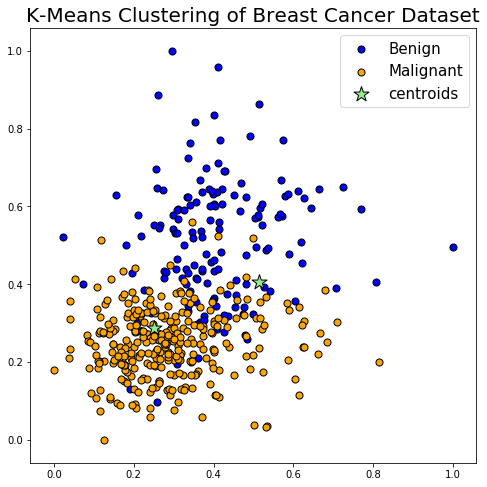

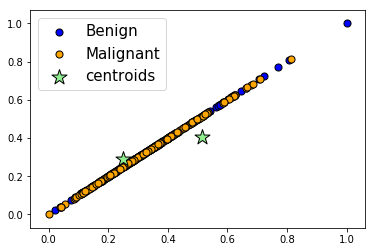

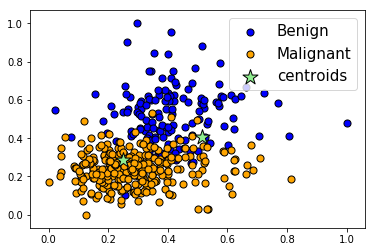

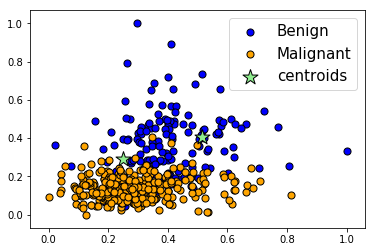

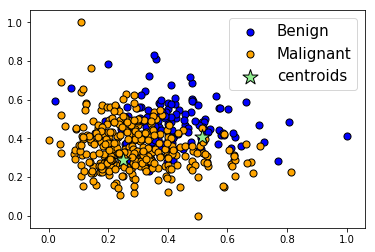

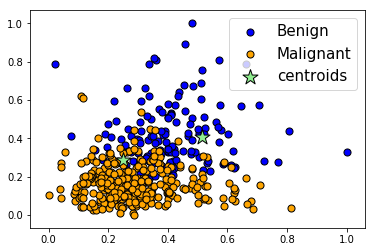

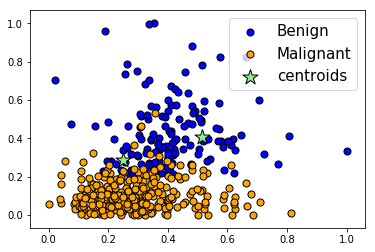

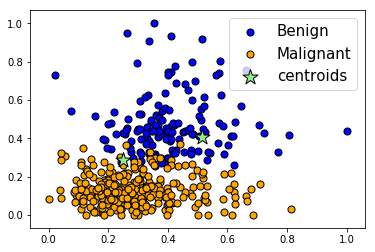

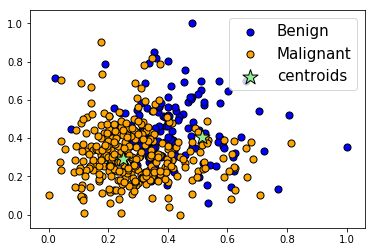

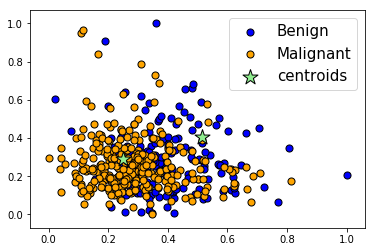

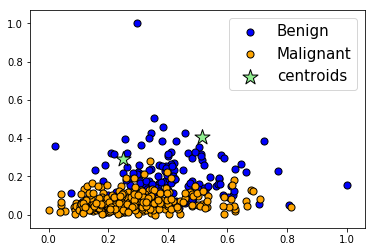

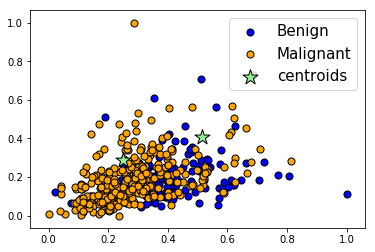

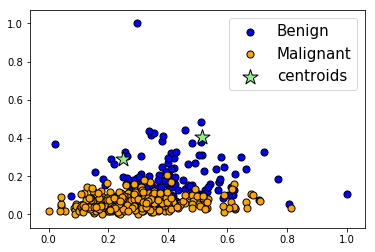

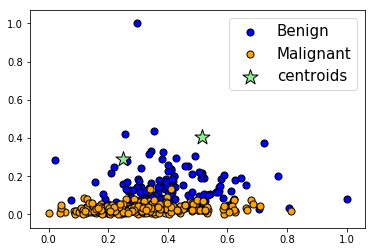

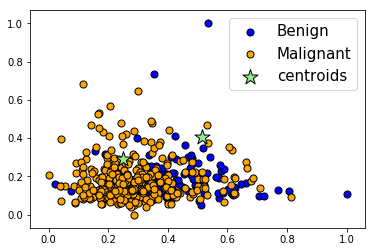

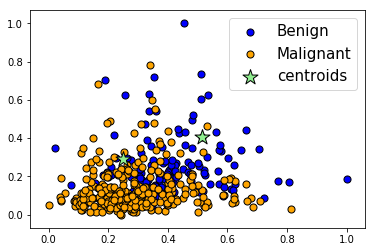

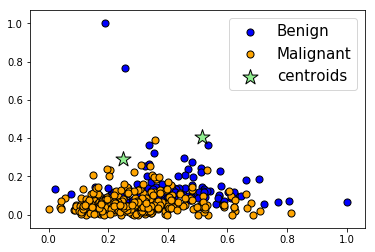

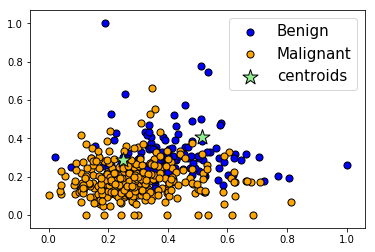

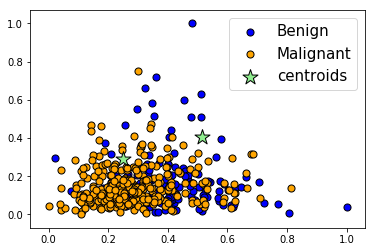

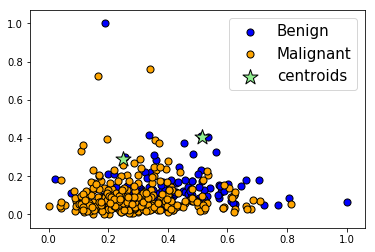

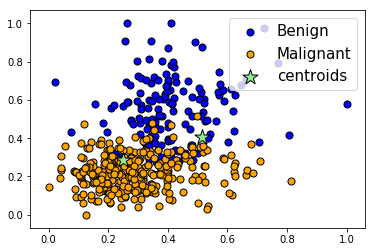

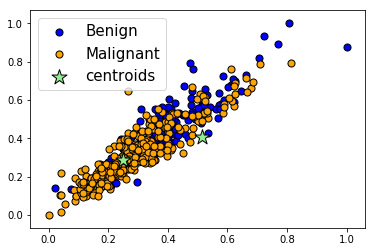

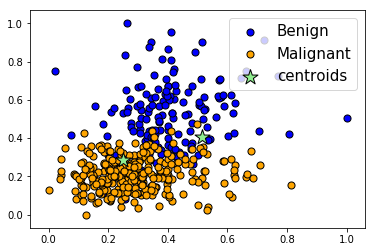

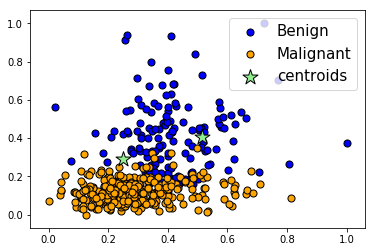

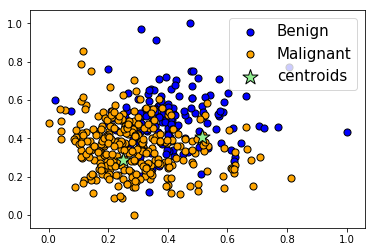

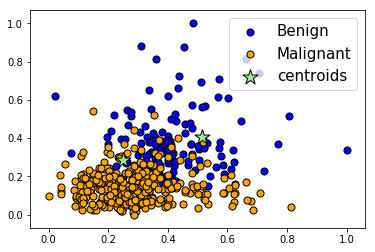

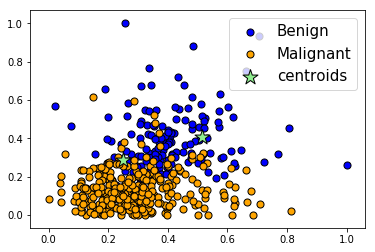

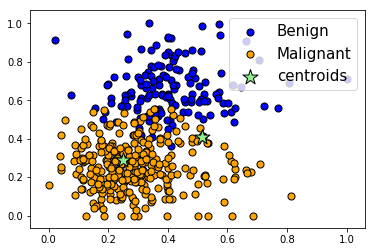

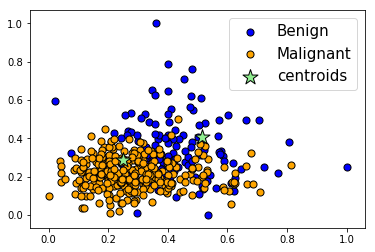

In [271]:
# plot the 2 clusters

plt.figure()
plt.figure(figsize=(8,8))
plt.title("K-Means Clustering of Breast Cancer Dataset",fontsize=20)

for n in range(29):

    plt.scatter(
        X_scaled[y_km == 0, 1], X_scaled[y_km == 0, n],
        s=50, c='blue',
        marker='o', edgecolor='black',
        label='Benign'
    )

    plt.scatter(
        X_scaled[y_km == 1, 1], X_scaled[y_km == 1, n],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='Malignant'
    )


    # plot the centroids
    plt.scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
        s=250, marker='*',
        c='lightgreen', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1,prop={'size': 15})
    #plt.grid()
    plt.show()